In [22]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import RFE  

In [37]:
#importing the credit classification dataset
df = pd.read_csv('../../datasets/Project/train.csv')

In [38]:
#taking a look at the number of rows and columns
df.shape

(100000, 28)

In [39]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [27]:
#checking if there are any null values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [28]:
#Being target column lets see unique values of credit_score column
df['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

In [13]:
#Missing values
#df['Credit_Score'].mode().iloc[0]   #Standard
#df['Credit_Score'].fillna(value=df['Credit_Score'].mode().iloc[0], inplace=True)

In [29]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# Feature encoding

In [31]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [32]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [41]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [42]:
cat_col = ['Payment_of_Min_Amount','Payment_Behaviour']

In [43]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe.fit(df[cat_col])
columns_encoded = ohe.get_feature_names_out()
df[columns_encoded] = ohe.transform(df[cat_col])

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
df['Credit_Score'] = df['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [17]:
rfe = RFE(RandomForestClassifier(),n_features_to_select=0.5)
rfe.fit(df[columns_encoded], df['Credit_Score'])

RFE(estimator=RandomForestClassifier(), n_features_to_select=0.5)

In [18]:
list(zip(columns_encoded,rfe.ranking_))

[('Payment_of_Min_Amount_NM', 1),
 ('Payment_of_Min_Amount_No', 1),
 ('Payment_of_Min_Amount_Yes', 1),
 ('Payment_Behaviour_High_spent_Large_value_payments', 2),
 ('Payment_Behaviour_High_spent_Medium_value_payments', 3),
 ('Payment_Behaviour_High_spent_Small_value_payments', 5),
 ('Payment_Behaviour_Low_spent_Large_value_payments', 6),
 ('Payment_Behaviour_Low_spent_Medium_value_payments', 4),
 ('Payment_Behaviour_Low_spent_Small_value_payments', 1)]

In [45]:
 col = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
'Delay_from_due_date', 'Num_of_Delayed_Payment','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age',
'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
'Payment_of_Min_Amount_Yes','Payment_Behaviour_Low_spent_Small_value_payments']

In [61]:
len(col)

18

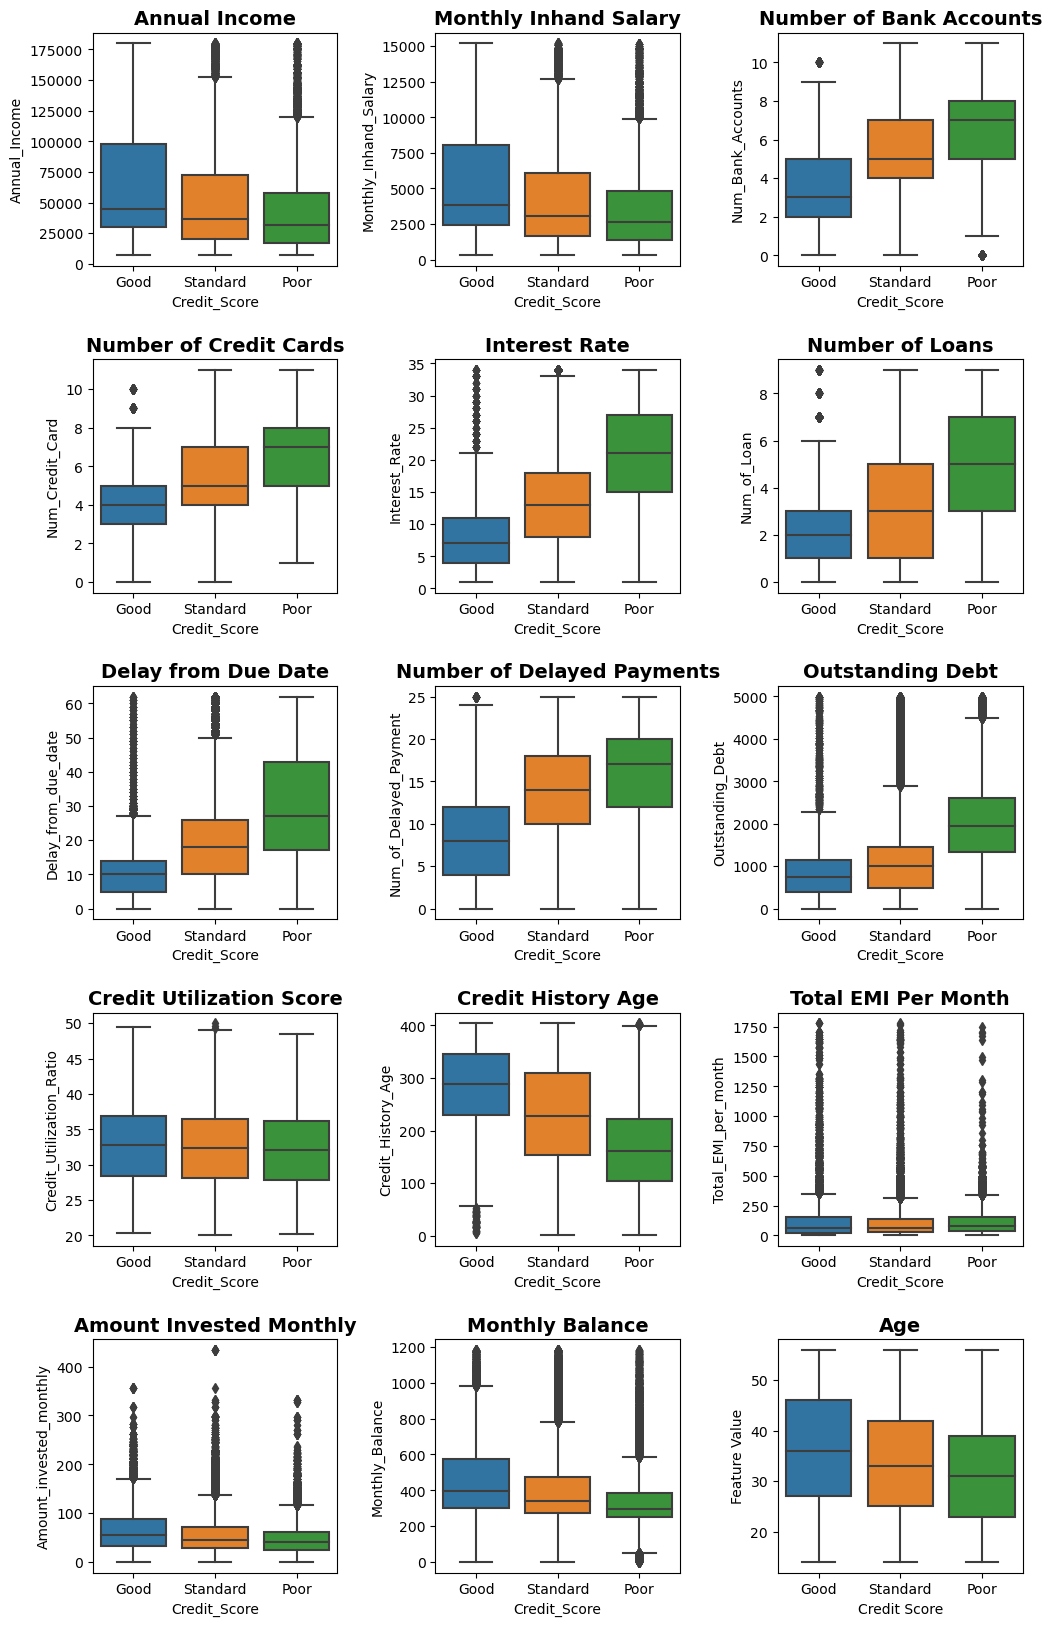

In [20]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3,figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14])



# Add a title and labels
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards', 
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

In [46]:

df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [47]:
X = df[col]
y = df['Credit_Score']

In [48]:
#Split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
models = {
    'Log reg':LogisticRegression(),
    'SVM-Lin':SVC(kernel='linear'),
    'SVM-Pol':SVC(kernel='poly'),
    'SVM-RBF':SVC(kernel='rbf'),
    'DT': DecisionTreeClassifier(max_depth=4, min_samples_leaf=6),
    'RF':RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=4, n_estimators=25, n_jobs=-1),
    'KNN-3':KNeighborsClassifier(n_neighbors=3),
    'KNN-5':KNeighborsClassifier(n_neighbors=5),
    'KNN-7':KNeighborsClassifier(n_neighbors=7),
    'AdB':AdaBoostClassifier()
}

In [55]:
print('Model','\tACC',sep='\t\t')
print('-'*30)
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    score = model.score(X_test_scaled,y_test )
    print(name,'',round(score,2),sep='\t')

Model			ACC
------------------------------


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log reg		0.62
SVM-Lin		0.63
SVM-Pol		0.67
SVM-RBF		0.67
DT		0.66
RF		0.65
KNN-3		0.7
KNN-5		0.7
KNN-7		0.7
AdB		0.64


In [61]:
rmodel = RandomForestClassifier(max_depth=13, min_samples_leaf=4, n_estimators=300, n_jobs=-1)
rmodel.fit(X_train_scaled,y_train)
rmodel.score(X_train_scaled,y_train) , rmodel.score(X_test_scaled,y_test)

(0.7749428571428572, 0.7351333333333333)